<a href="https://colab.research.google.com/github/Taehwan2/hanghaeAI/blob/main/B_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [3]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:07<00:00, 23.5MB/s]


In [4]:
print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])

50000
torch.Size([3, 32, 32]) 6


In [5]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [6]:
from torch import nn


class Model1(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [7]:
# SGD
from torch.optim import SGD, Adam

lr = 0.001

model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

train_sgd = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sgd.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 450.4045226573944
Epoch   2 | Loss: 449.0586266517639
Epoch   3 | Loss: 448.0405077934265
Epoch   4 | Loss: 447.0964512825012
Epoch   5 | Loss: 446.20172786712646
Epoch   6 | Loss: 445.30300116539
Epoch   7 | Loss: 444.4098813533783
Epoch   8 | Loss: 443.5288259983063
Epoch   9 | Loss: 442.6216654777527
Epoch  10 | Loss: 441.7046711444855
Epoch  11 | Loss: 440.76238203048706
Epoch  12 | Loss: 439.8433952331543
Epoch  13 | Loss: 438.8840100765228
Epoch  14 | Loss: 437.93798637390137
Epoch  15 | Loss: 437.0250930786133
Epoch  16 | Loss: 436.1031196117401
Epoch  17 | Loss: 435.19149136543274
Epoch  18 | Loss: 434.29984641075134
Epoch  19 | Loss: 433.4173731803894
Epoch  20 | Loss: 432.5447633266449
Epoch  21 | Loss: 431.70729207992554
Epoch  22 | Loss: 430.87579798698425
Epoch  23 | Loss: 430.1107220649719
Epoch  24 | Loss: 429.2805438041687
Epoch  25 | Loss: 428.5497291088104
Epoch  26 | Loss: 427.82967138290405
Epoch  27 | Loss: 427.1181924343109
Epoch  28 | Loss: 426.

In [8]:
# Adam
model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_adam = []
test_adam = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_adam.append(accuracy(model, trainloader))
  test_adam.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 433.4896969795227
Epoch   2 | Loss: 390.33893036842346
Epoch   3 | Loss: 369.4452873468399
Epoch   4 | Loss: 355.2310997247696
Epoch   5 | Loss: 341.5540466308594
Epoch   6 | Loss: 331.4730248451233
Epoch   7 | Loss: 322.9975094795227
Epoch   8 | Loss: 314.8466362953186
Epoch   9 | Loss: 309.5872938632965
Epoch  10 | Loss: 303.4928412437439
Epoch  11 | Loss: 297.29530823230743
Epoch  12 | Loss: 292.3675493001938
Epoch  13 | Loss: 288.5396535396576
Epoch  14 | Loss: 285.63885486125946
Epoch  15 | Loss: 281.4510723352432
Epoch  16 | Loss: 277.96971666812897
Epoch  17 | Loss: 273.5531288385391
Epoch  18 | Loss: 269.6447511911392
Epoch  19 | Loss: 270.4564517736435
Epoch  20 | Loss: 264.0735641717911
Epoch  21 | Loss: 262.4556999206543
Epoch  22 | Loss: 257.89157378673553
Epoch  23 | Loss: 254.87819123268127
Epoch  24 | Loss: 251.5532364845276
Epoch  25 | Loss: 248.21998476982117
Epoch  26 | Loss: 245.35787153244019
Epoch  27 | Loss: 241.84005498886108
Epoch  28 | Loss: 2

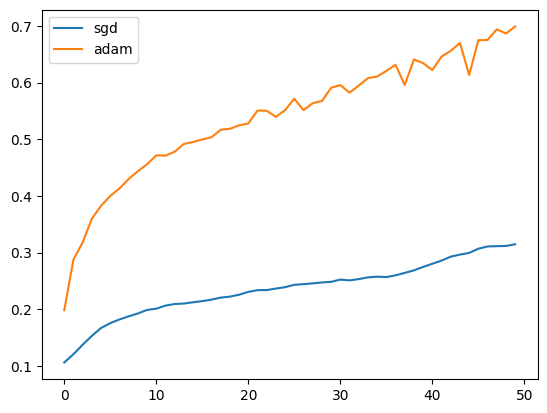

In [9]:
plot_acc(train_sgd, train_adam, 'sgd', 'adam')

In [10]:
class Model2(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [11]:
model = Model2(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_sigmoid = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sigmoid.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 412.5045642852783
Epoch   2 | Loss: 394.9716144800186
Epoch   3 | Loss: 387.90719163417816
Epoch   4 | Loss: 384.50316286087036
Epoch   5 | Loss: 381.61452782154083
Epoch   6 | Loss: 379.6166777610779
Epoch   7 | Loss: 377.6350988149643
Epoch   8 | Loss: 376.35867154598236
Epoch   9 | Loss: 374.93286073207855
Epoch  10 | Loss: 374.04091024398804
Epoch  11 | Loss: 372.5460464954376
Epoch  12 | Loss: 370.9470075368881
Epoch  13 | Loss: 369.54847526550293
Epoch  14 | Loss: 369.10587906837463
Epoch  15 | Loss: 368.6109082698822
Epoch  16 | Loss: 367.3367557525635
Epoch  17 | Loss: 366.7210785150528
Epoch  18 | Loss: 365.2409266233444
Epoch  19 | Loss: 364.64610409736633
Epoch  20 | Loss: 364.2317156791687
Epoch  21 | Loss: 363.70606791973114
Epoch  22 | Loss: 363.4606862068176
Epoch  23 | Loss: 363.50152039527893
Epoch  24 | Loss: 362.11492359638214
Epoch  25 | Loss: 361.42935371398926
Epoch  26 | Loss: 362.20627295970917
Epoch  27 | Loss: 360.93858098983765
Epoch  28 | L

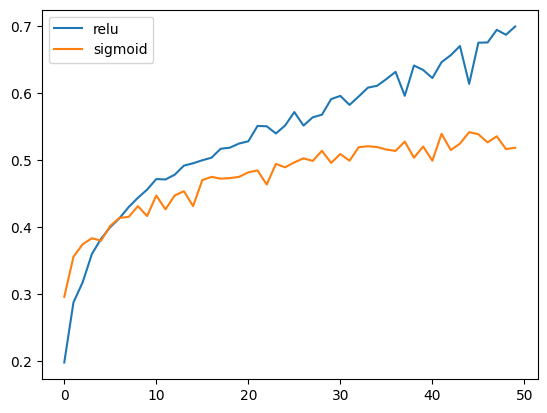

In [12]:
plot_acc(train_adam, train_sigmoid, 'relu', 'sigmoid')

In [13]:
# Dropout

class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.act(self.layer3(x)))

    return x

In [14]:
model = Model3(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_dropout = []
test_dropout = []

for epoch in range(n_epochs):
  total_loss = 0.
  model.train()
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    model.eval()
    train_dropout.append(accuracy(model, trainloader))
    test_dropout.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 443.33205699920654
Epoch   2 | Loss: 416.37329936027527
Epoch   3 | Loss: 409.76876401901245
Epoch   4 | Loss: 401.3984696865082
Epoch   5 | Loss: 394.41143107414246
Epoch   6 | Loss: 386.74635207653046
Epoch   7 | Loss: 382.06774854660034
Epoch   8 | Loss: 376.1190448999405
Epoch   9 | Loss: 373.3229023218155
Epoch  10 | Loss: 370.03384935855865
Epoch  11 | Loss: 366.6791578531265
Epoch  12 | Loss: 363.85041856765747
Epoch  13 | Loss: 362.24943029880524
Epoch  14 | Loss: 357.8862979412079
Epoch  15 | Loss: 357.17891931533813
Epoch  16 | Loss: 354.29233598709106
Epoch  17 | Loss: 351.72179663181305
Epoch  18 | Loss: 350.08059906959534
Epoch  19 | Loss: 348.2064702510834
Epoch  20 | Loss: 345.0237420797348
Epoch  21 | Loss: 343.46079874038696
Epoch  22 | Loss: 342.6810677051544
Epoch  23 | Loss: 340.2572635412216
Epoch  24 | Loss: 337.6000258922577
Epoch  25 | Loss: 338.62475538253784
Epoch  26 | Loss: 335.98020565509796
Epoch  27 | Loss: 334.34732365608215
Epoch  28 |

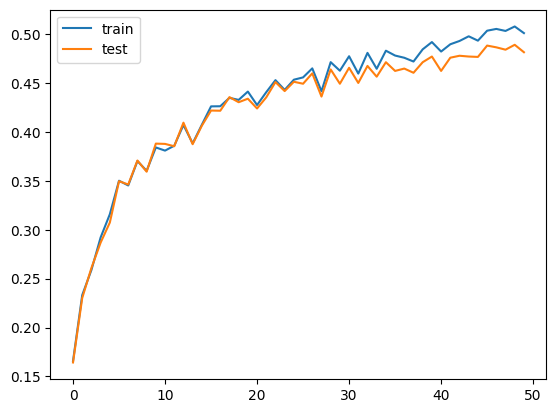

In [15]:
plot_acc(train_dropout, test_dropout)